In [13]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [15]:
BASE_PATH = r'../../../neuro_dataset/sub-01_task-SocialMemoryCuing_eeg'
raw = mne.io.read_raw_brainvision(rf"{BASE_PATH}.vhdr", preload=True)

Extracting parameters from ../../../neuro_dataset/sub-01_task-SocialMemoryCuing_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 1421690  =      0.000 ...  2843.380 secs...


C:\Users\gonza\AppData\Local\Temp\ipykernel_19340\2100055653.py:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_brainvision(rf"{BASE_PATH}.vhdr", preload=True)


In [4]:
raw.info

Measurement date,"November 11, 2019 14:40:57 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,88 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\gonza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


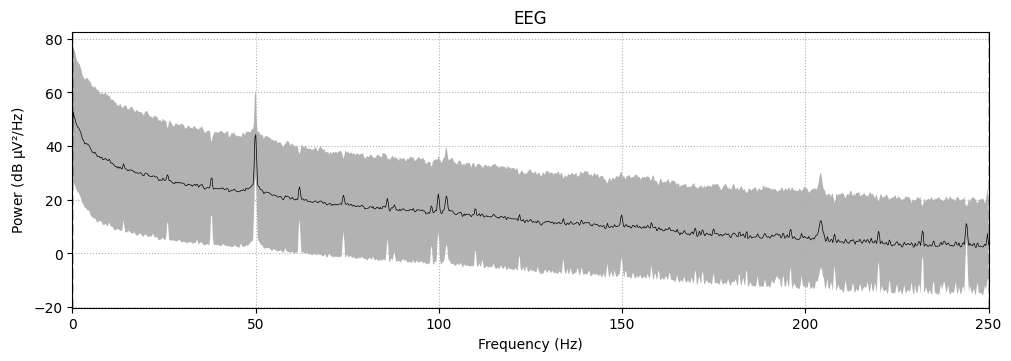

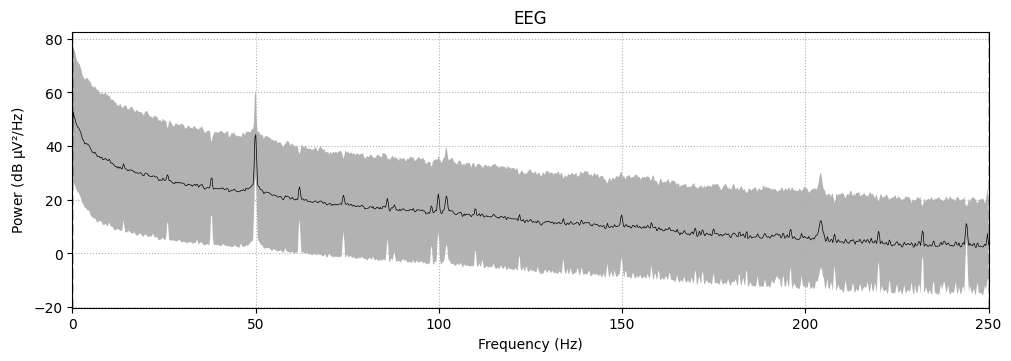

In [5]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, amplitude=False, picks="data", exclude="bads")

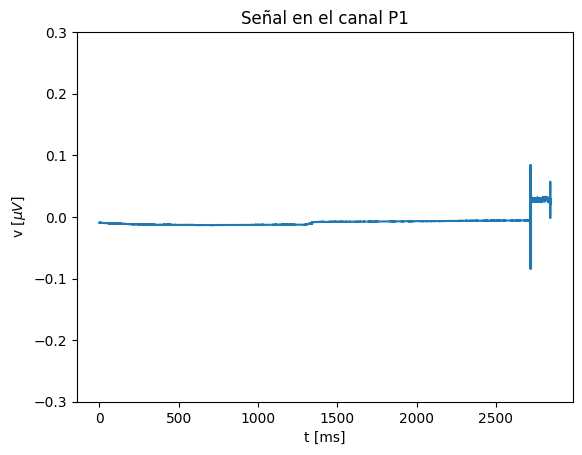

In [6]:
P1 = raw.pick('P1')
P1_data = P1.get_data().ravel()
plt.plot(raw.times, P1_data)
plt.title('Señal en el canal P1')
plt.xlabel('t [ms]')
plt.ylabel(f'v [$\mu V$]')
plt.ylim(-0.3, 0.3)
plt.show()

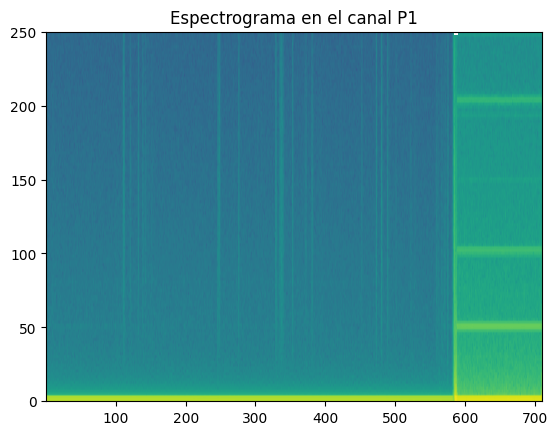

In [9]:
np.seterr(divide = 'ignore') 
spectrum, fr, ti, im = plt.specgram(P1_data[int(0.75*len(P1_data)):], Fs=500)
plt.title('Espectrograma en el canal P1')
plt.show()